# Data wrangling of ALFAH-SNP combined dataset

### Author: Mareli Mostert
### Date executed: 9 October 2023

#### Adapted from: How to data wrangle using python ~ Author: Vinet Coetzee 
#### Reference: https://github.com/vcoetzee/how-to-files/blob/main/how-to-data-wrangle_u.ipynb

## 1. Install and import the necesary packages and libraries

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

## 2. Import data from excel file to pandas dataframe

In [2]:
# Import the combined dataset file which was created in and exported from the MySQL environment
# Replace 'C:/Users/...' with the relevant file path of the combined dataset file (.xls format)
df = pd.read_excel('C:/Users/...')

In [3]:
# Visualise the dataframe headers and the first 5 lines/rows of the dataframe
# Check whether the data was succesfully read into the dataframe
df.head(5)

,index,id,age,sex,income,items_home,cold_flu,antibiotics,ill_7days,ill_now,...,rs1801133,rs4961,rs2241766,rs670,rs1799883,rs10182181,rs6265,rs3764261,rs13702,facility
0,0,1,20.8,1,2,7,1,0,False,False,...,1,1,2,2,3,3,3,2,2,upsala
1,1,2,20.6,0,2,9,2,0,False,False,...,1,2,3,1,3,3,3,1,2,upsala
2,2,3,19.9,0,2,4,1,1,True,True,...,1,1,3,1,2,2,3,2,2,upsala
3,3,4,23.1,0,2,9,1,0,True,False,...,1,1,3,1,3,3,3,2,3,upsala
4,4,5,22.5,0,1,9,1,1,False,False,...,1,1,3,1,3,3,3,2,3,upsala


# Data Cleanup

## 3. Check if the data in the dataframe is in the correct shape and format

In [4]:
# Check the number of observations (rows) and variables (columns/ attributes)
df.shape

(261, 179)

In [5]:
# Provides info on the number of observations (rows) and variables (columns/ attributes) + Non-Null Count and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 179 entries, index to facility
dtypes: bool(4), float64(100), int64(74), object(1)
memory usage: 358.0+ KB


In [6]:
# Provides info on the count, mean, std, min, 25%, 50%, 75%, and max for each column
df.describe(include = 'all')
# Check your min values. Are there any columns that have a min value of '0' where it is not possible, 
# indicating possible misscoded 'missing variables'

,index,id,age,sex,income,items_home,cold_flu,antibiotics,ill_7days,ill_now,...,rs1801133,rs4961,rs2241766,rs670,rs1799883,rs10182181,rs6265,rs3764261,rs13702,facility
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261,261,...,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,219
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cpgr
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196,234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129
mean,129.547893,141.091954,20.735983,0.540230,1.574713,7.808429,2.448276,1.241379,NaN,NaN,...,0.931034,0.961686,2.463602,1.195402,2.111111,2.379310,2.498084,1.544061,1.735632,NaN
std,75.058968,83.862383,1.876331,0.499336,0.826934,2.004247,1.717054,1.698181,NaN,NaN,...,0.514253,0.539290,1.104021,0.746877,1.077350,1.108444,1.108098,0.917235,0.982067,NaN
min,0.000000,1.000000,17.900000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,65.000000,68.000000,19.300000,0.000000,1.000000,7.000000,1.000000,0.000000,NaN,NaN,...,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,NaN
50%,130.000000,143.000000,20.500000,1.000000,1.000000,9.000000,2.000000,1.000000,NaN,NaN,...,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,NaN
75%,194.000000,214.000000,21.700000,1.000000,2.000000,9.000000,3.000000,2.000000,NaN,NaN,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,NaN


When looking at the 'facility' count, it is only 219 instead of 261 for the other columns. THUS: not all samples from the ALFAH dataset were sequenced/genotyped, therefore, these sample data needs to be removed from the dataset.

In [7]:
# Check whether there are cells with blank values 'facility' column
# Looked at excel spreadsheet --> rows with index 55 to 61 identified to contain some blank cells in 'facility' column
df.loc[55:61,'facility']

55    upsala
56    upsala
57    upsala
58    upsala
59       NaN
60       NaN
61       NaN
Name: facility, dtype: object

## 4. Identify any missing values

In [8]:
# Identify the number of missing values for each column
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

index
False    261
Name: index, dtype: int64

id
False    261
Name: id, dtype: int64

age
False    261
Name: age, dtype: int64

sex
False    261
Name: sex, dtype: int64

income
False    261
Name: income, dtype: int64

items_home
False    261
Name: items_home, dtype: int64

cold_flu
False    261
Name: cold_flu, dtype: int64

antibiotics
False    261
Name: antibiotics, dtype: int64

ill_7days
False    261
Name: ill_7days, dtype: int64

ill_now
False    261
Name: ill_now, dtype: int64

exercise_stren
False    261
Name: exercise_stren, dtype: int64

exercise_mod
False    261
Name: exercise_mod, dtype: int64

fruit_juice
False    261
Name: fruit_juice, dtype: int64

fruit
False    261
Name: fruit, dtype: int64

veg
False    261
Name: veg, dtype: int64

red_meat
False    261
Name: red_meat, dtype: int64

chicken
False    261
Name: chicken, dtype: int64

pork
False    261
Name: pork, dtype: int64

fish
False    261
Name: fish, dtype: int64

eggs
False    261
Name: eggs, dtype: int64

bread
Fa

No missing data is present in any of the columns according to the results above.

## 5. Drop rows with NaN (null) or missing values

In [9]:
# Drop entire row for all instances where there is a NaN in a cell in the 'facility' column
# axis=0 drops the rows
# inplace=True (modification done on the dataset directly i.e. changes dataset)
df.dropna(subset=['facility'], axis=0, inplace=True) 

In [10]:
# Reset index, because rows were dropped
df.reset_index(drop=True, inplace=True)

In [11]:
# Check if the rows with null (NaN values) were dropped
df.shape

(219, 179)

The row count for the dataframe changed from 261 to 219, indicating that rows with missingg/NaN values were dropped.

## 6. Check if all data is in the correct format (1)

In [12]:
# Check the assigned data types for all columns
# Specify the following to see the entire list instead of a truncated list:
pd.set_option('display.max_rows', None)
# Specify the following to see the entire list instead of a truncated list:Let's display max columns too 
pd.set_option('display.max_columns', None)

df.dtypes

index                              int64
id                                 int64
age                              float64
sex                                int64
income                             int64
items_home                         int64
cold_flu                           int64
antibiotics                        int64
ill_7days                           bool
ill_now                             bool
exercise_stren                     int64
exercise_mod                       int64
fruit_juice                        int64
fruit                              int64
veg                                int64
red_meat                           int64
chicken                            int64
pork                               int64
fish                               int64
eggs                               int64
bread                              int64
pap_samp                           int64
rice_pasta                         int64
dairy                              int64
soft_drinks     

The data types were evaluated to be correct and were therefore not changed in this case.

## 7. Save preliminary cleaned dataset (1)

This step is to save the entire cleaned dataset before unnecessary columns are removed to facilitate/simplify analyses.

In [13]:
# Download the preliminary cleaned dataset (giving it a relevant file name)
df.to_csv('all_data_cleaned.csv')
df.to_excel('all_data_cleaned.xlsx')

## 8. Visualising the data (1)

In [14]:
# Basic evaluation of all variables (as before)
df.describe()

,index,id,age,sex,income,items_home,cold_flu,antibiotics,exercise_stren,exercise_mod,fruit_juice,fruit,veg,red_meat,chicken,pork,fish,eggs,bread,pap_samp,rice_pasta,dairy,soft_drinks,take_away,avg_systbp,avg_diabp,body_fat,muscle_mass,bmi,visceral_fat,metabolic_age,bfat_rarm,bfat_rleg,bfat_trunk,ecw_percentage,fat_rarm,fat_rleg,fat_trunk,muscle_rarm,muscle_rleg,muscle_trunk,left_grip,right_grip,sitting_height,standing_height,age_log,age_log_capped,exercise,exercise_capped,fruitveg_index,carbs_index,protein_index,junkfood_index,pork_log,pork_log_capped,fish_log,fish_log_capped,avg_systbp2,avg_systbp_capped,avg_diabp2,avg_diabp_capped,muscle_mass_capped,bmi_log,bmi_log_capped,visceral_fat_log,ecw_percentage_capped,avg_grip,avg_grip_capped,sitting_height_capped,standing_height_capped,age_scaled,cold_flu_scaled,antibiotics_scaled,fruit_juice_scaled,fruit_scaled,veg_scaled,red_meat_scaled,chicken_scaled,pork_scaled,fish_scaled,eggs_scaled,bread_scaled,pap_samp_scaled,rice_pasta_scaled,dairy_scaled,soft_drinks_scaled,take_away_scaled,smoke_scaled,alcohol_scaled,body_fat_scaled,muscle_mass_scaled,bmi_scaled,visceral_fat_scaled,metabolic_age_scaled,bfat_rarm_scaled,bfat_rleg_scaled,bfat_trunk_scaled,ecw_percentage_scaled,fat_rarm_scaled,fat_rleg_scaled,fat_trunk_scaled,muscle_rarm_scaled,muscle_rleg_scaled,muscle_trunk_scaled,sitting_height_scaled,standing_height_scaled,age_log_capped_scaled,exercise_scaled,exercise_capped_scaled,fruitveg_index_scaled,carbs_index_scaled,protein_index_scaled,junkfood_index_scaled,pork_log_capped_scaled,fish_log_capped_scaled,avg_systbp2_scaled,avg_systbp_capped_scaled,avg_diabp2_scaled,avg_diabp_capped_scaled,muscle_mass_capped_scaled,bmi_log_capped_scaled,visceral_fat_log_scaled,ecw_percentage_capped_scaled,avg_grip_scaled,avg_grip_capped_scaled,sitting_height_capped_scaled,standing_height_capped_scaled,infections_index,infections_index2,infections_index_log,infections_index_scaled,infections_index_log_scaled,pc1_bodycomp1,pc2_bodycomp1,pc1_bodycomp2,pc2_bodycomp2,pc1_bodycomp3,pc2_bodycomp3,pc1_bodycomp4,pc2_bodycomp4,id2,rs174547,rs9939609,rs1558902,rs731236,rs1801282,rs964184,rs1544410,rs780094,rs1535,rs4506565,rs10830963,rs7903146,rs174537,rs174550,rs8192678,rs4740619,rs12255372,rs3734398,rs2236212,rs3798713,rs174548,rs174546,rs968567,rs1501299,rs1801133,rs4961,rs2241766,rs670,rs1799883,rs10182181,rs6265,rs3764261,rs13702
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.0

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'items_home'}>,
        <Axes: title={'center': 'cold_flu'}>,
        <Axes: title={'center': 'antibiotics'}>,
        <Axes: title={'center': 'exercise_stren'}>,
        <Axes: title={'center': 'exercise_mod'}>,
        <Axes: title={'center': 'fruit_juice'}>,
        <Axes: title={'center': 'fruit'}>,
        <Axes: title={'center': 'veg'}>],
       [<Axes: title={'center': 'red_meat'}>,
        <Axes: title={'center': 'chicken'}>,
        <Axes: title={'center': 'pork'}>,
        <Axes: title={'center': 'fish'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'bread'}>,
        <Axes: title={'center': 'pap_samp'}>,
        <Axes: title={'center': 'rice_pasta'}>,
        <Axes: title={'center': 'dairy'}>,
        <Axes: title={'

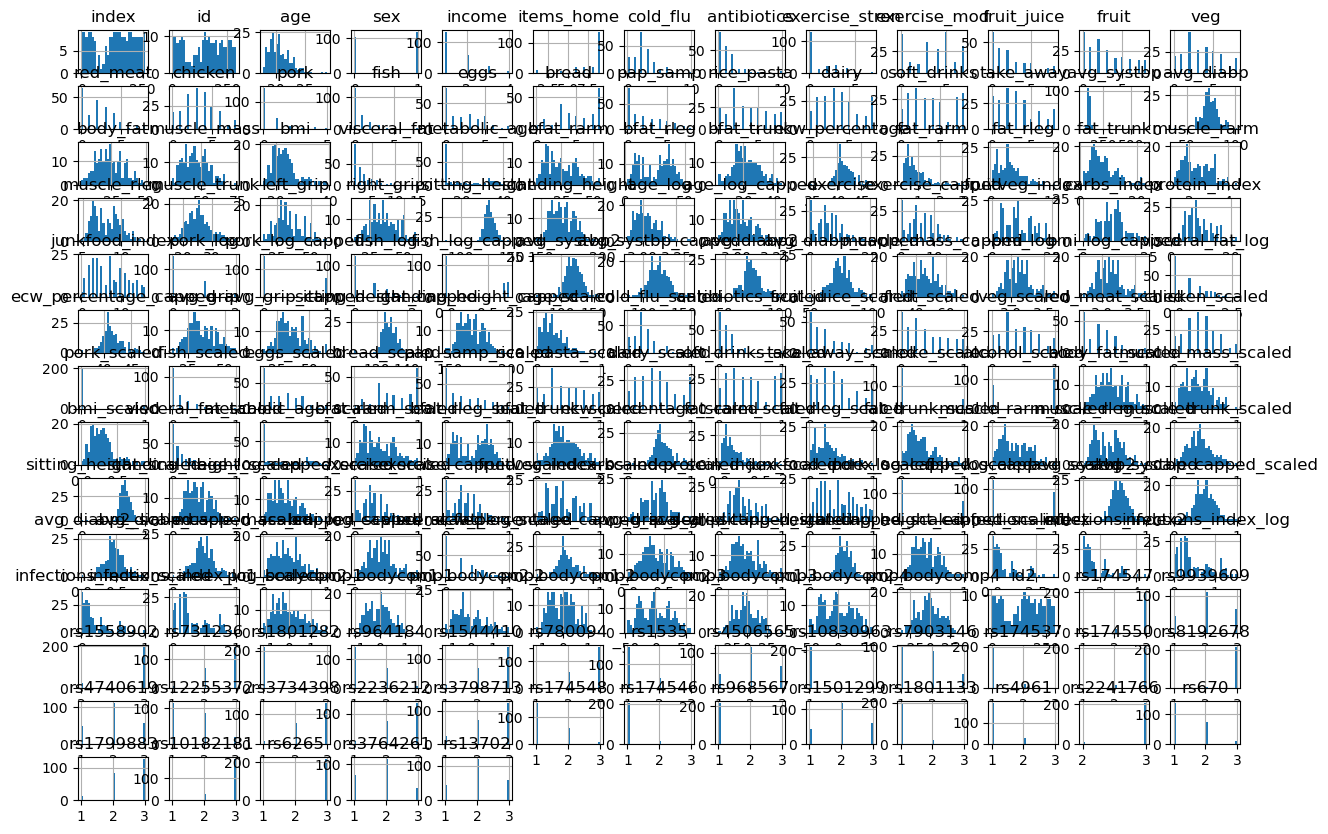

In [15]:
# Plotted histograms to get a feel for the data, especially to evaluate outliers and normality of distributions
df.hist(bins=30, figsize=(15, 10))

# Data Subset Cleanup

A subset of the data was created to facilitate/simplify analyses of SNPs with chosen variables.

## 9. Drop columns that are unnecessary

In [16]:
# Drop unnecssary columns
# I.e., all except: 'index', 'id', 'age', 'sex', 'body_fat', 'muscle_mass', '#all SNPS#', 'facility'
# axis=1 drops the columns
df.drop(['income', 'items_home', 'cold_flu', 'antibiotics', 'ill_7days',
    'ill_now', 'exercise_stren', 'exercise_mod', 'fruit_juice', 'fruit', 'veg', 'red_meat', 'chicken', 'pork', 'fish',
    'eggs', 'bread', 'pap_samp', 'rice_pasta', 'dairy', 'soft_drinks', 'take_away', 'smoke', 'alcohol', 
    'avg_systbp', 'avg_diabp', 'bmi', 'visceral_fat', 'metabolic_age', 'bfat_rarm', 'bfat_rleg', 'bfat_trunk', 
    'ecw_percentage', 'fat_rarm', 'fat_rleg', 'fat_trunk', 'muscle_rarm', 'muscle_rleg', 'muscle_trunk', 
    'left_grip', 'right_grip', 'sitting_height', 'standing_height', 'age_log', 'age_log_capped', 'exercise', 'exercise_capped',
    'fruitveg_index', 'carbs_index', 'protein_index', 'junkfood_index', 'pork_log', 'pork_log_capped', 'fish_log', 
    'fish_log_capped', 'avg_systbp2', 'avg_systbp_capped', 'avg_diabp2', 'avg_diabp_capped', 'muscle_mass_capped', 
    'bmi_log', 'bmi_log_capped', 'visceral_fat_log', 'ecw_percentage_capped', 'avg_grip', 'avg_grip_capped', 
    'sitting_height_capped', 'standing_height_capped', 'age_scaled', 'cold_flu_scaled', 'antibiotics_scaled', 
    'fruit_juice_scaled', 'fruit_scaled', 'veg_scaled', 'red_meat_scaled', 'chicken_scaled', 'pork_scaled', 'fish_scaled', 
    'eggs_scaled', 'bread_scaled', 'pap_samp_scaled', 'rice_pasta_scaled', 'dairy_scaled', 'soft_drinks_scaled', 
    'take_away_scaled', 'smoke_scaled', 'alcohol_scaled', 'bmi_scaled', 'visceral_fat_scaled', 
    'metabolic_age_scaled', 'bfat_rarm_scaled', 'bfat_rleg_scaled', 'bfat_trunk_scaled', 'ecw_percentage_scaled', 
    'fat_rarm_scaled', 'fat_rleg_scaled', 'fat_trunk_scaled', 'muscle_rarm_scaled', 'muscle_rleg_scaled', 'muscle_trunk_scaled', 
    'sitting_height_scaled', 'standing_height_scaled', 'age_log_capped_scaled', 'exercise_scaled', 'exercise_capped_scaled', 
    'fruitveg_index_scaled', 'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'pork_log_capped_scaled', 
    'fish_log_capped_scaled', 'avg_systbp2_scaled', 'avg_systbp_capped_scaled', 'avg_diabp2_scaled', 'avg_diabp_capped_scaled', 
    'muscle_mass_capped_scaled', 'bmi_log_capped_scaled', 'visceral_fat_log_scaled', 'ecw_percentage_capped_scaled', 
    'avg_grip_scaled', 'avg_grip_capped_scaled', 'sitting_height_capped_scaled', 'standing_height_capped_scaled', 
    'infections_index', 'infections_index2', 'infections_index_log', 'infections_index_scaled', 'infections_index_log_scaled', 
    'pc1_bodycomp1', 'pc2_bodycomp1', 'pc1_bodycomp2', 'pc2_bodycomp2', 'pc1_bodycomp3', 'pc2_bodycomp3', 'pc1_bodycomp4', 
    'pc2_bodycomp4', 'id2', 'body_fat_scaled', 'muscle_mass_scaled'], axis=1, inplace=True) 

In [17]:
# Check if the columns were dropped
df.shape

(219, 40)

## 10. Check if subset data is in the correct format (2)

In [18]:
# Check the assigned data types for all columns
# Specify the following to see the entire list instead of a truncated list:
pd.set_option('display.max_rows', None)
# Specify the following to see the entire list instead of a truncated list:Let's display max columns too 
pd.set_option('display.max_columns', None)

df.dtypes

index            int64
id               int64
age            float64
sex              int64
body_fat       float64
muscle_mass    float64
rs174547         int64
rs9939609        int64
rs1558902        int64
rs731236         int64
rs1801282        int64
rs964184         int64
rs1544410        int64
rs780094         int64
rs1535           int64
rs4506565        int64
rs10830963       int64
rs7903146        int64
rs174537         int64
rs174550         int64
rs8192678        int64
rs4740619        int64
rs12255372       int64
rs3734398        int64
rs2236212        int64
rs3798713        int64
rs174548         int64
rs174546         int64
rs968567         int64
rs1501299        int64
rs1801133        int64
rs4961           int64
rs2241766        int64
rs670            int64
rs1799883        int64
rs10182181       int64
rs6265           int64
rs3764261        int64
rs13702          int64
facility        object
dtype: object

## 11. Save the cleaned data subset

In [19]:
# Export new data subset to csv and excel files
df.to_csv('subset_data_cleaned.csv')
df.to_excel('subset_data_cleaned.xlsx')

## 12. Visualising the data (2)

In [20]:
# Basic evaluation of subset variables
df.describe()

,index,id,age,sex,body_fat,muscle_mass,rs174547,rs9939609,rs1558902,rs731236,rs1801282,rs964184,rs1544410,rs780094,rs1535,rs4506565,rs10830963,rs7903146,rs174537,rs174550,rs8192678,rs4740619,rs12255372,rs3734398,rs2236212,rs3798713,rs174548,rs174546,rs968567,rs1501299,rs1801133,rs4961,rs2241766,rs670,rs1799883,rs10182181,rs6265,rs3764261,rs13702
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,135.433790,148.086758,20.731011,0.529680,23.799442,46.248687,2.922374,2.091324,2.890411,2.593607,1.013699,1.392694,2.579909,2.666667,1.242009,2.100457,1.027397,1.712329,1.114155,2.922374,2.963470,2.027397,1.570776,2.579909,2.566210,2.447489,1.351598,1.086758,1.027397,2.077626,1.109589,1.146119,2.936073,1.424658,2.515982,2.835616,2.977169,1.840183,2.068493
std,78.179334,87.066550,1.843993,0.500262,9.932380,8.578401,0.284785,0.697879,0.313092,0.570011,0.116503,0.559441,0.587920,0.527530,0.470084,0.683320,0.163612,0.719571,0.359320,0.284785,0.211024,0.703320,0.648403,0.580065,0.581796,0.684515,0.558204,0.312959,0.189587,0.682952,0.341139,0.366762,0.245183,0.580678,0.600818,0.406835,0.177726,0.675272,0.677193
min,0.000000,1.000000,17.900000,0.000000,3.200000,30.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,54.500000,57.500000,19.400000,0.000000,16.300000,39.150000,3.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000
50%,145.000000,158.000000,20.400000,1.000000,22.900000,45.500000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,201.500000,223.000000,21.750000,1.000000,31.200000,51.900000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000
max,259.000000,290.000000,28.800000,1.000000,49.100000,73.500000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'body_fat'}>,
        <Axes: title={'center': 'muscle_mass'}>],
       [<Axes: title={'center': 'rs174547'}>,
        <Axes: title={'center': 'rs9939609'}>,
        <Axes: title={'center': 'rs1558902'}>,
        <Axes: title={'center': 'rs731236'}>,
        <Axes: title={'center': 'rs1801282'}>,
        <Axes: title={'center': 'rs964184'}>],
       [<Axes: title={'center': 'rs1544410'}>,
        <Axes: title={'center': 'rs780094'}>,
        <Axes: title={'center': 'rs1535'}>,
        <Axes: title={'center': 'rs4506565'}>,
        <Axes: title={'center': 'rs10830963'}>,
        <Axes: title={'center': 'rs7903146'}>],
       [<Axes: title={'center': 'rs174537'}>,
        <Axes: title={'center': 'rs174550'}>,
        <Axes: title={'center': 'rs8192678'}>,
        <Axes: title={'center': 'rs4740619'}>,
 

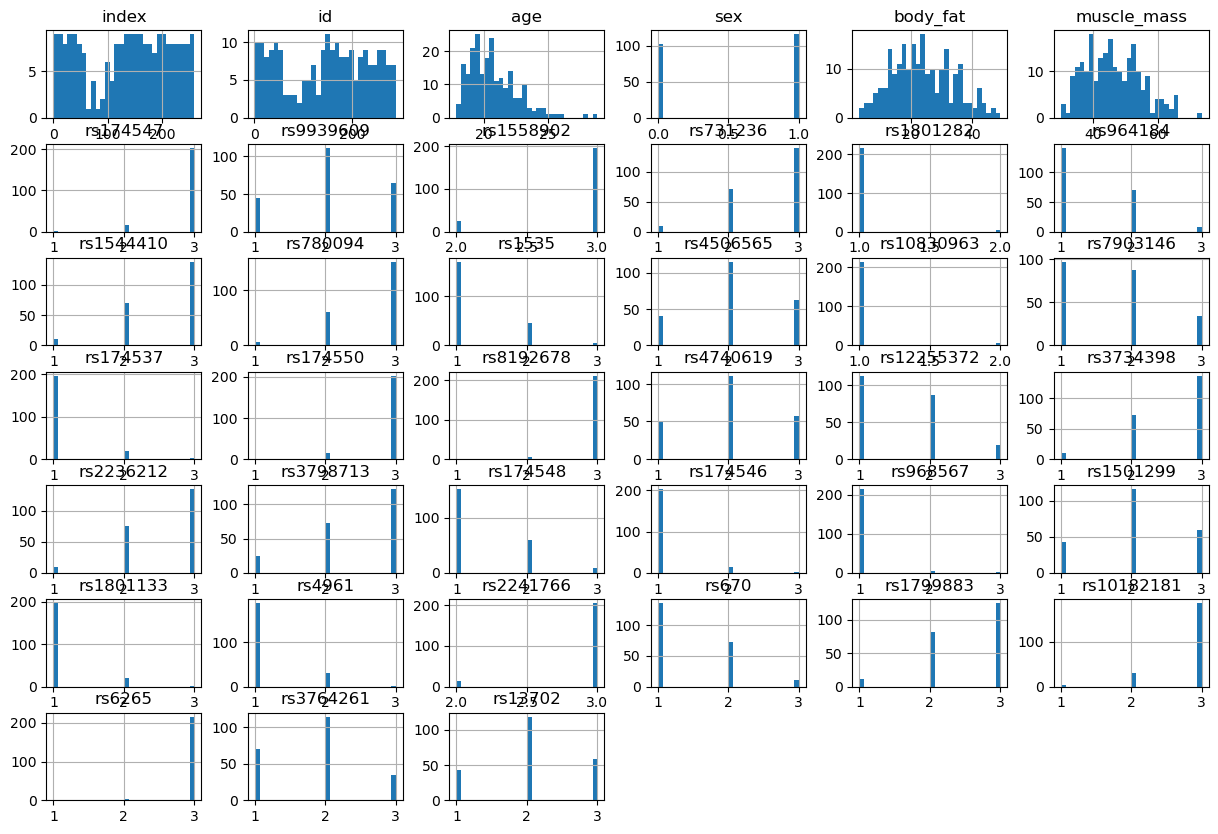

In [21]:
# Plotted histograms to get a feel for the data, especially to evaluate outliers and normality of distributions
df.hist(bins=30, figsize=(15, 10))